# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [88]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



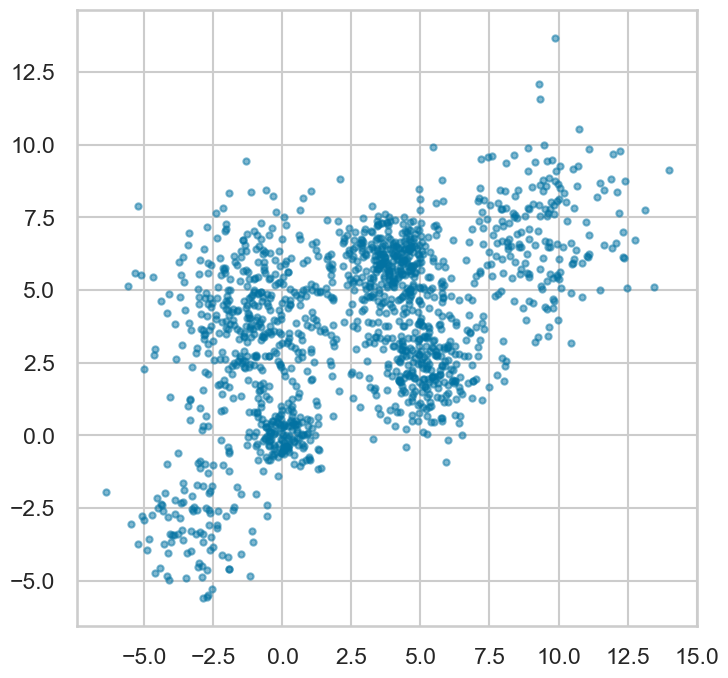

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [72]:
dftot = pd.DataFrame(Multi_blob_Data, columns=['col1','col2'])
dftot

col1       col2
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

           col1       col2
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]


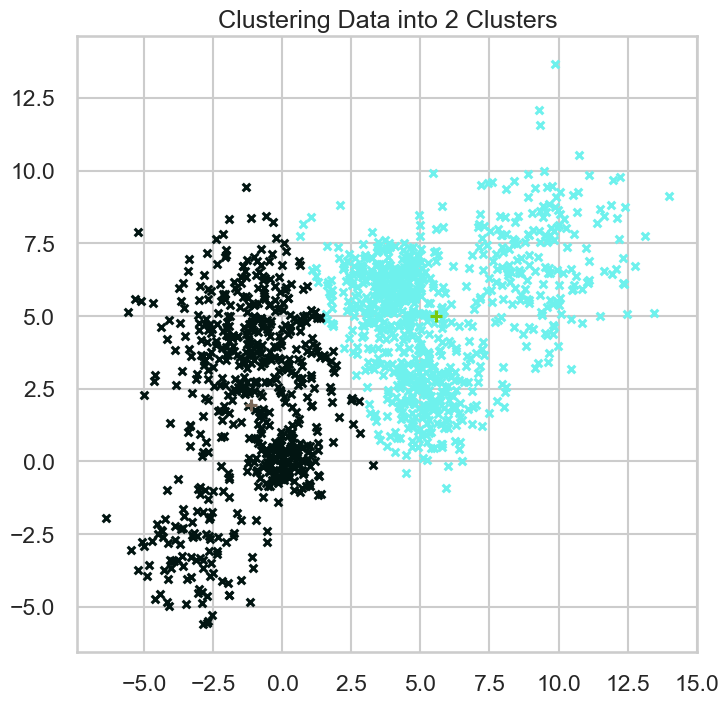

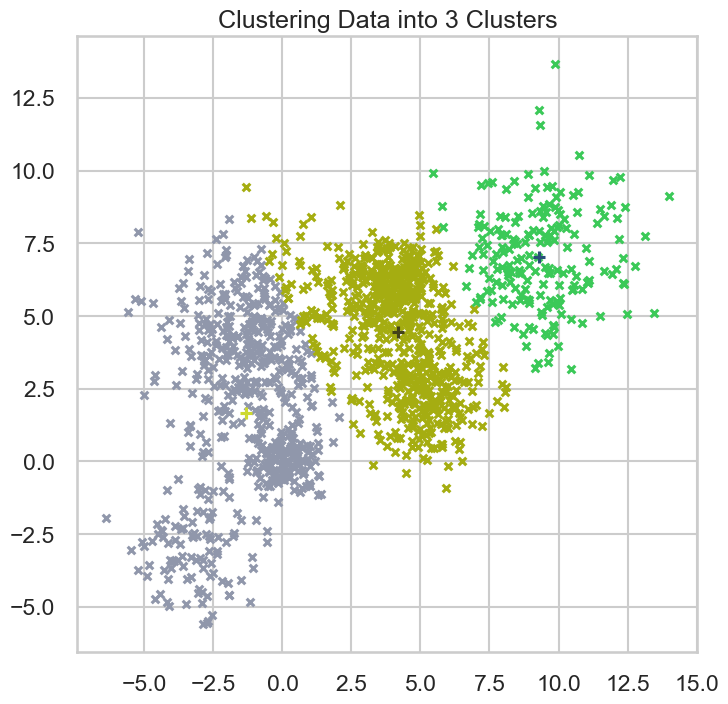

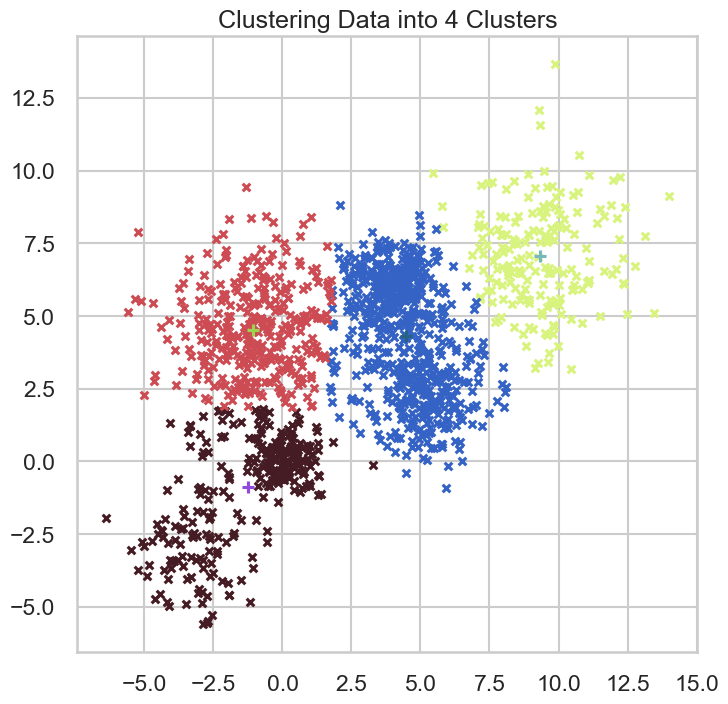

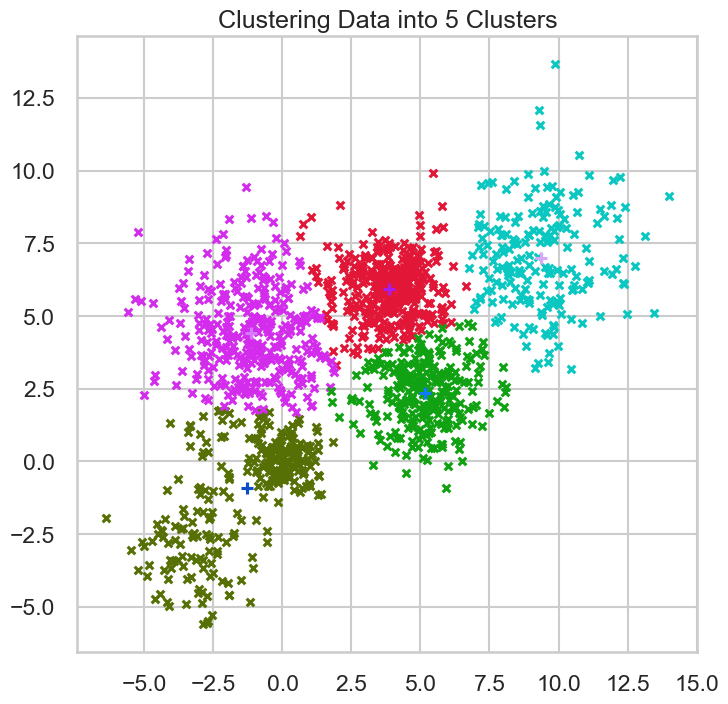

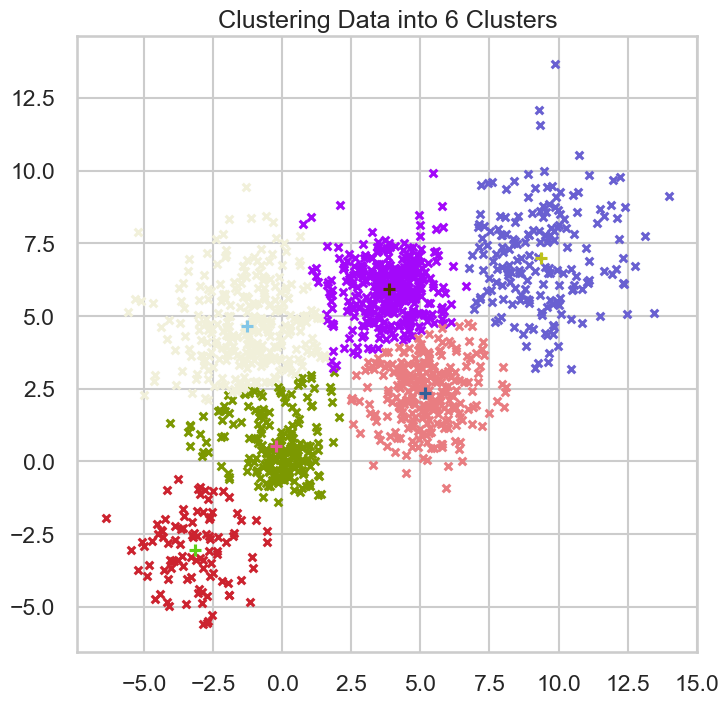

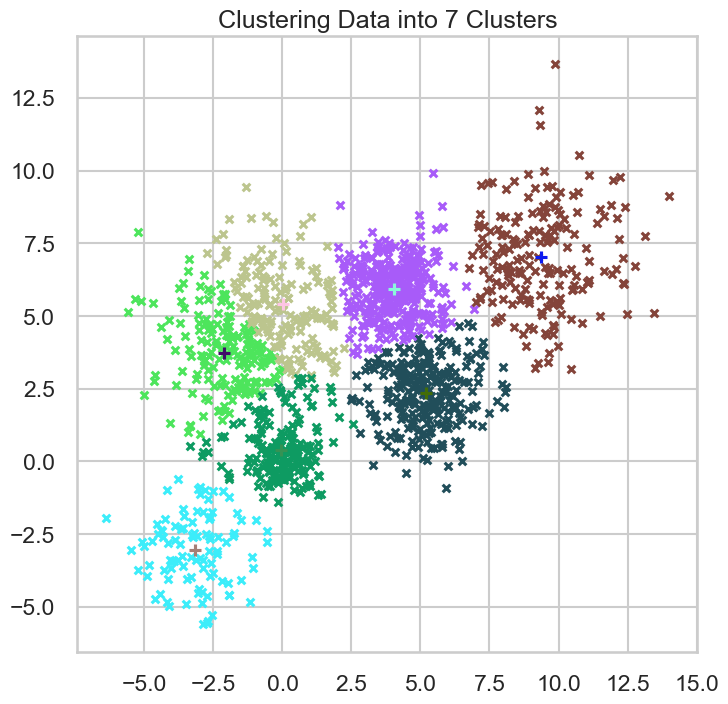

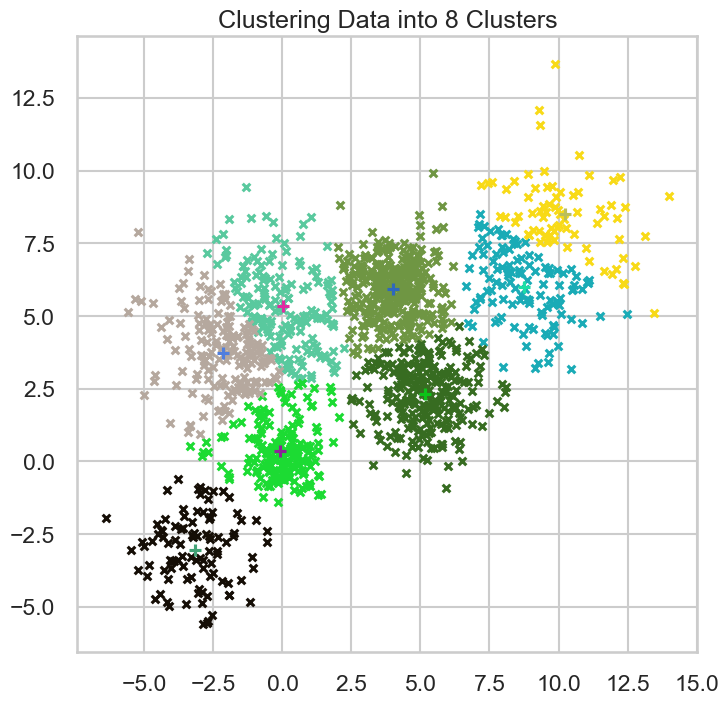

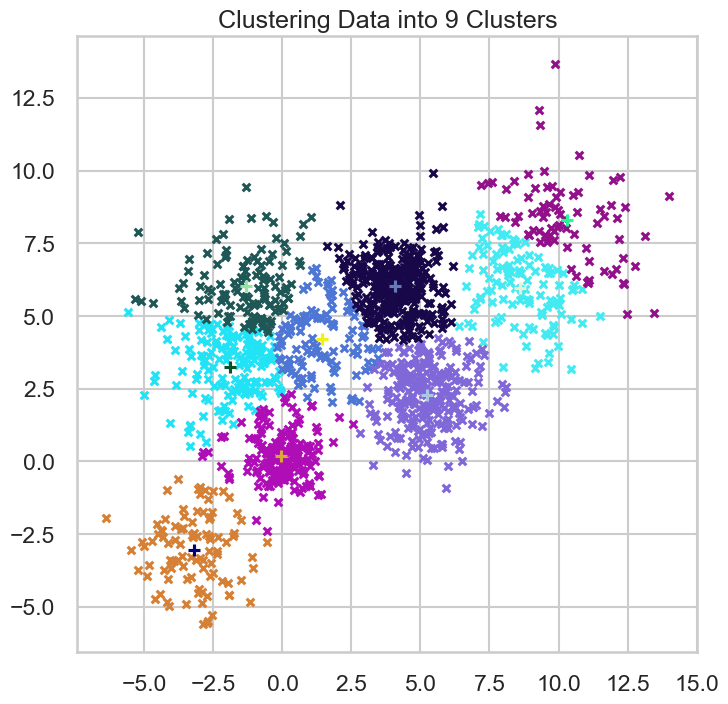

In [76]:
df_multi_km = dftot.iloc[:,:]
print(df_multi_km)
score_km = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(df_multi_km[['col1', 'col2']])
    df_multi_km['cluster'] = y_km
    set_cluster = set(y_km)
    for c in set_cluster:
        df = df_multi_km[df_multi_km['cluster'] == c]
        mean = df[['col1', 'col2']].mean()
        plt.scatter(df['col1'], df['col2'], s=30, c=np.random.rand(3,).reshape(1,-1), marker='x', label='cluster 1')
        plt.scatter(mean['col1'], mean['col2'], c=np.random.rand(3,).reshape(1,-1), marker='+')
    plt.title(f"Clustering Data into {k} Clusters")
    plt.show()
    score_km.append(silhouette_score(df_multi_km[['col1', 'col2']], y_km))

    

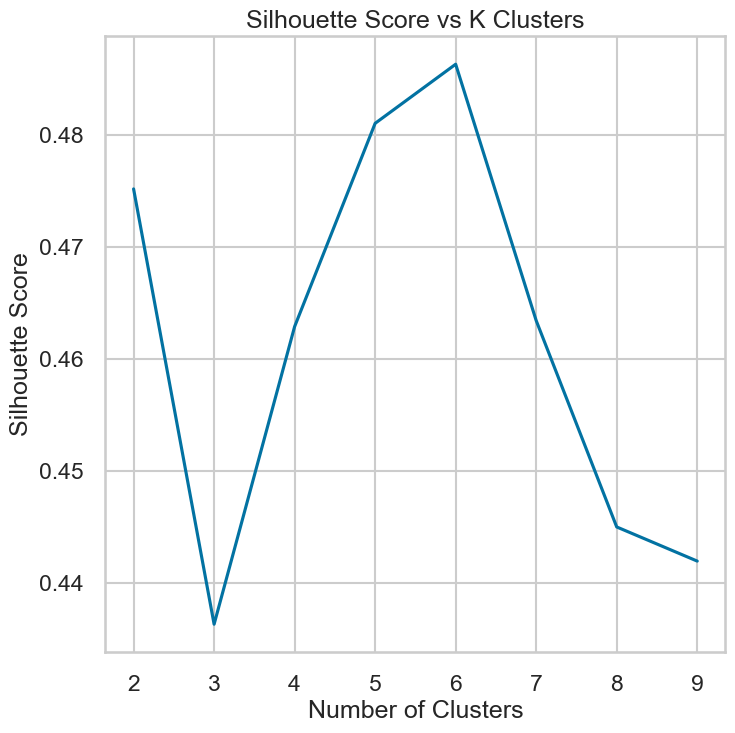

In [6]:
plt.title('Silhouette Score vs K Clusters')
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Score')
plt.plot(range(2,10),score_km)

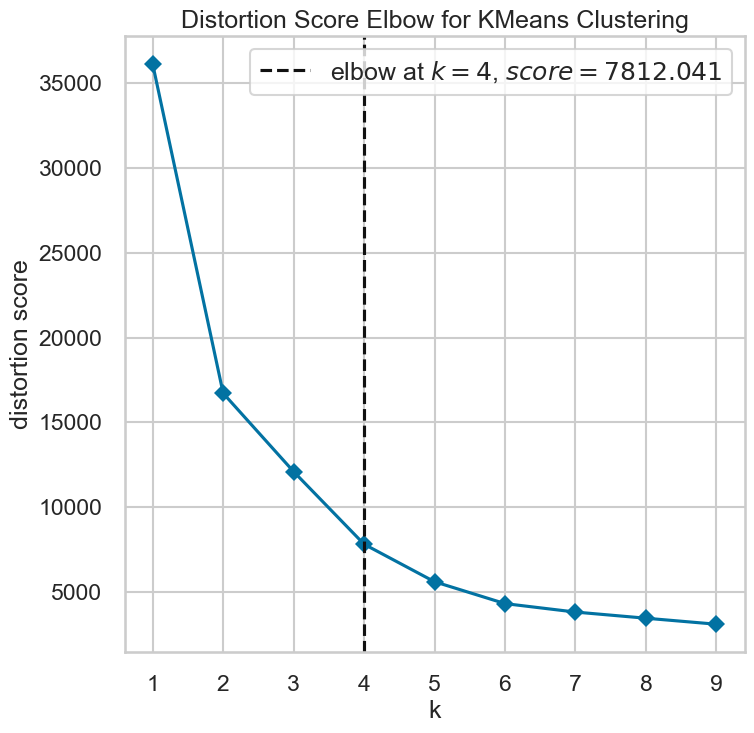

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(dftot[['col1', 'col2']])
visualizer.show()

#### Clustering with k = 4:

In [77]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(df_multi_km)
df_multi_km['cluster'] = y_km
df_multi_km

col1       col2  cluster
0     -2.354272  -3.179744        3
1     -2.158005  -1.020061        3
2     -3.304399  -3.304378        3
3     -0.947023  -2.002335        1
4     -3.610317  -2.294672        3
...         ...        ...      ...
1445   9.240137   3.378037        2
1446  10.305952   7.366174        2
1447   9.864057  13.674604        2
1448   5.457008   9.931984        2
1449   8.511339   7.488459        2

[1450 rows x 3 columns]

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [79]:
df_multi_hier = dftot.iloc[:,:]

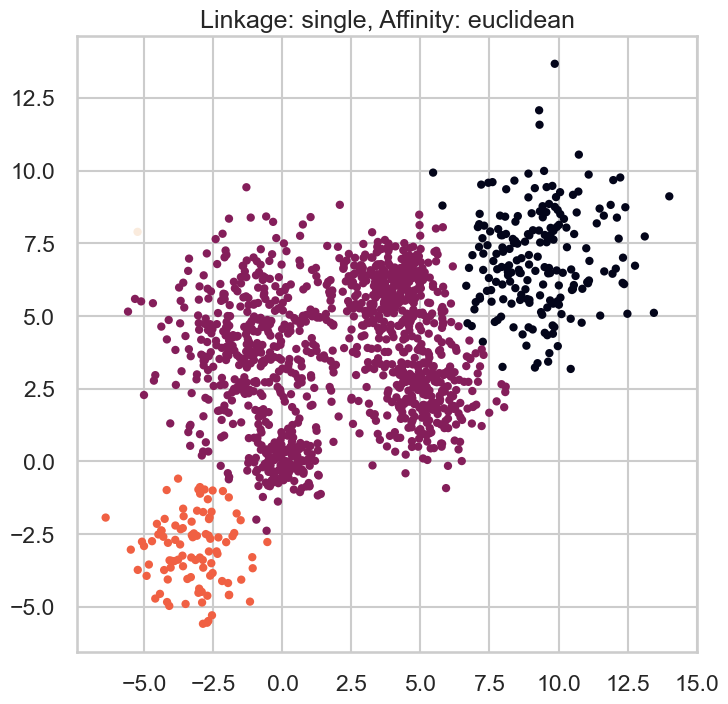

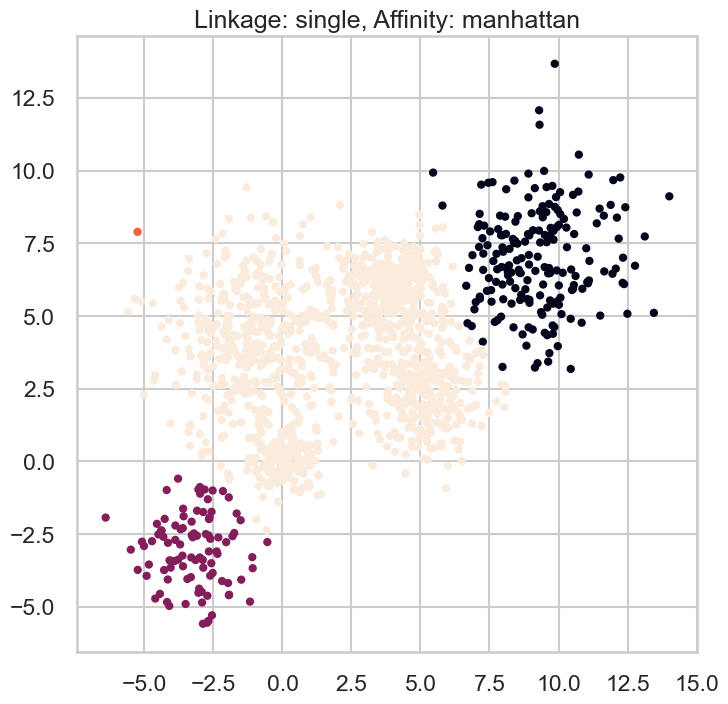

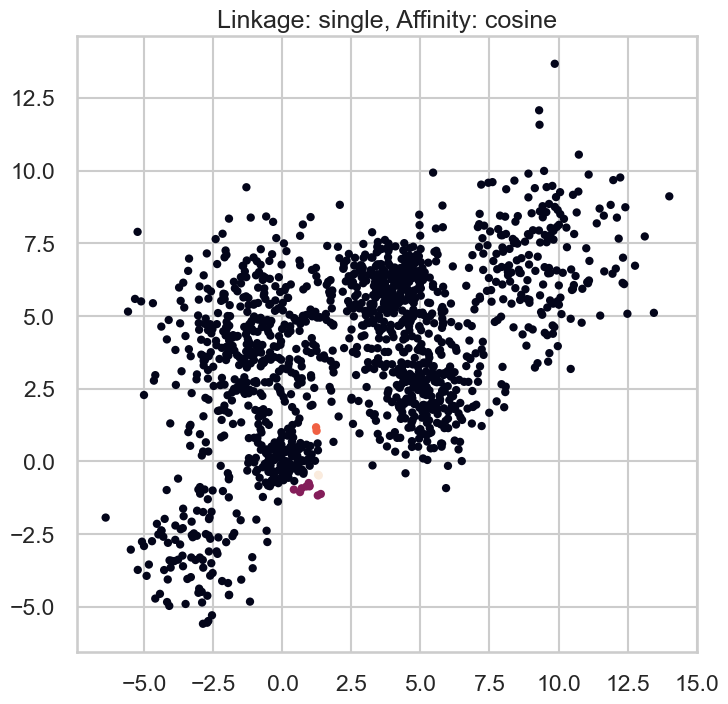

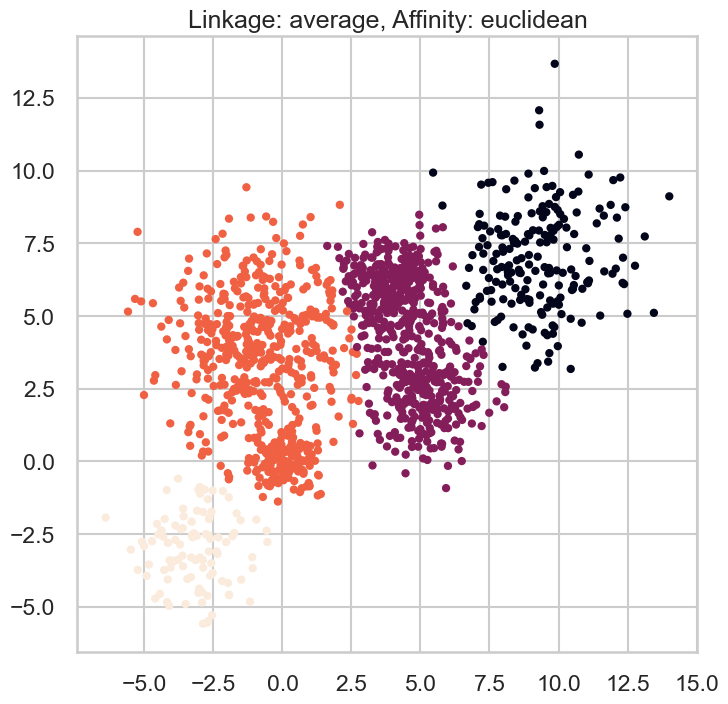

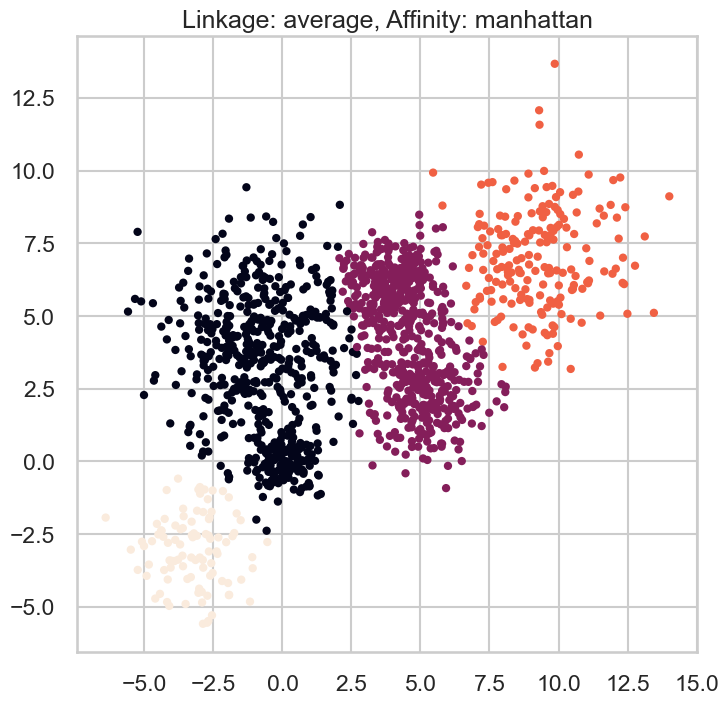

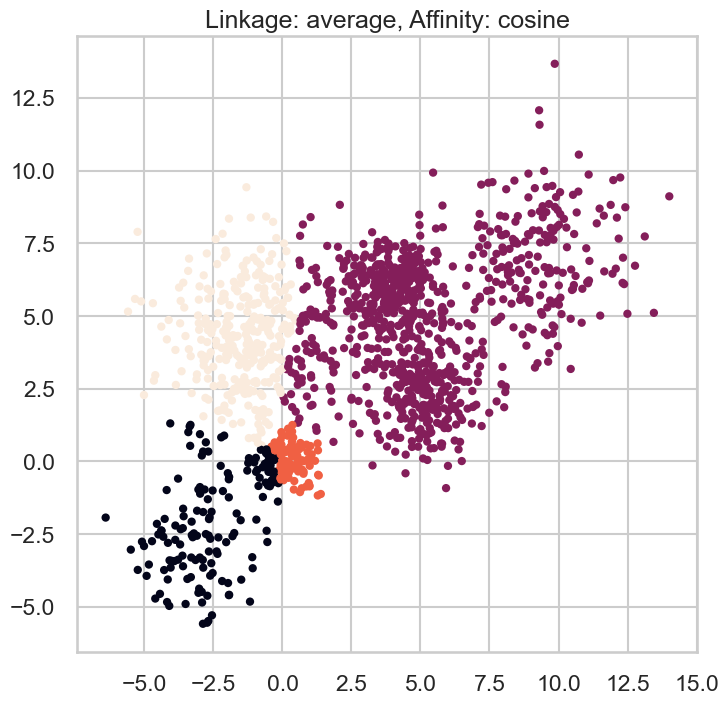

In [80]:
link = ['single','average']
aff = ['euclidean','manhattan','cosine']
for l in link:
    for a in aff:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity=a, linkage=l)
        labels = hierarchical_cluster.fit_predict(df_multi_hier)
        plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
        plt.title(f'Linkage: {l}, Affinity: {a}')
        plt.show()


In [78]:
# linkage_data = linkage(dftot, method='average', metric='euclidean')
# dendrogram(linkage_data)
# plt.show()

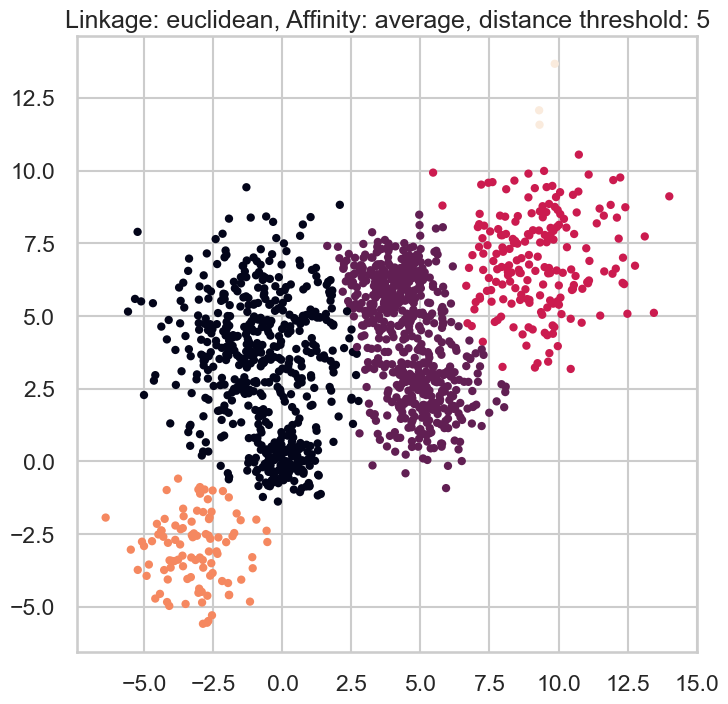

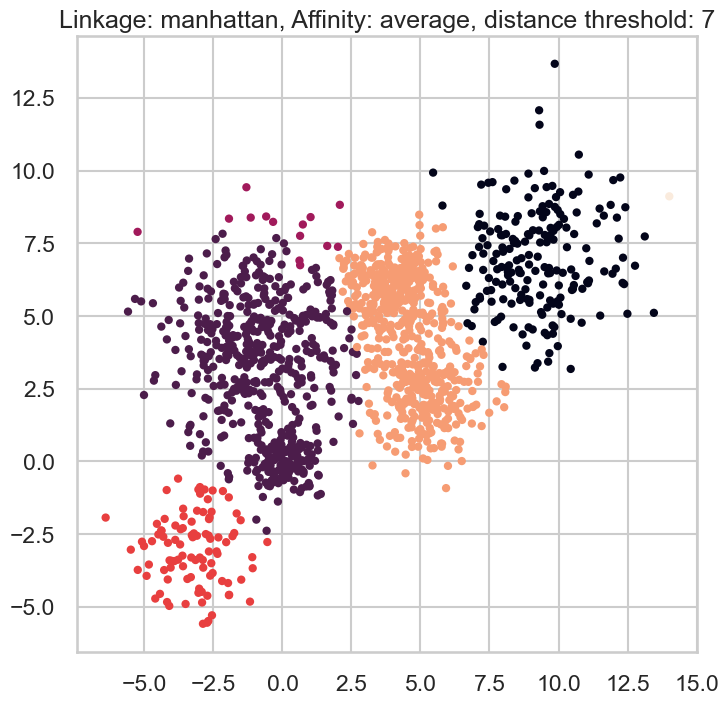

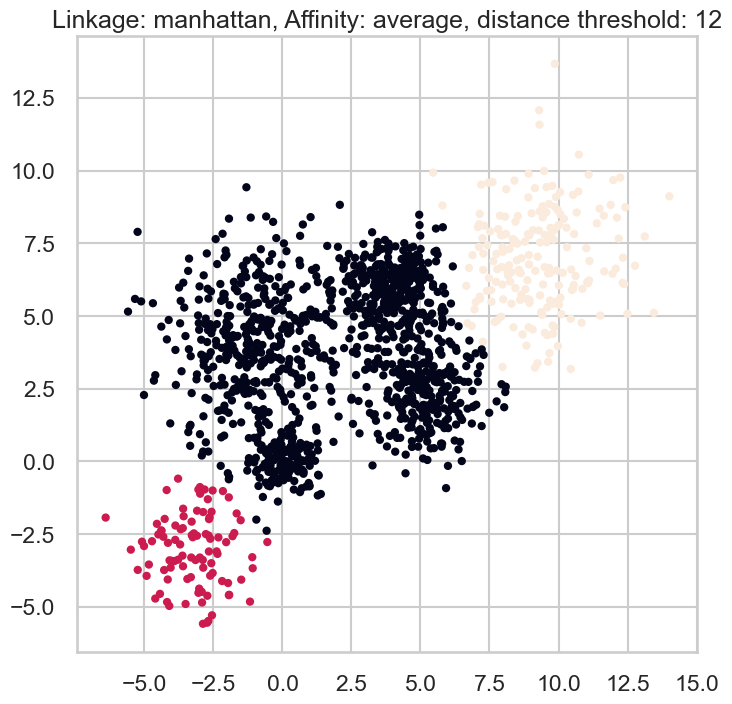

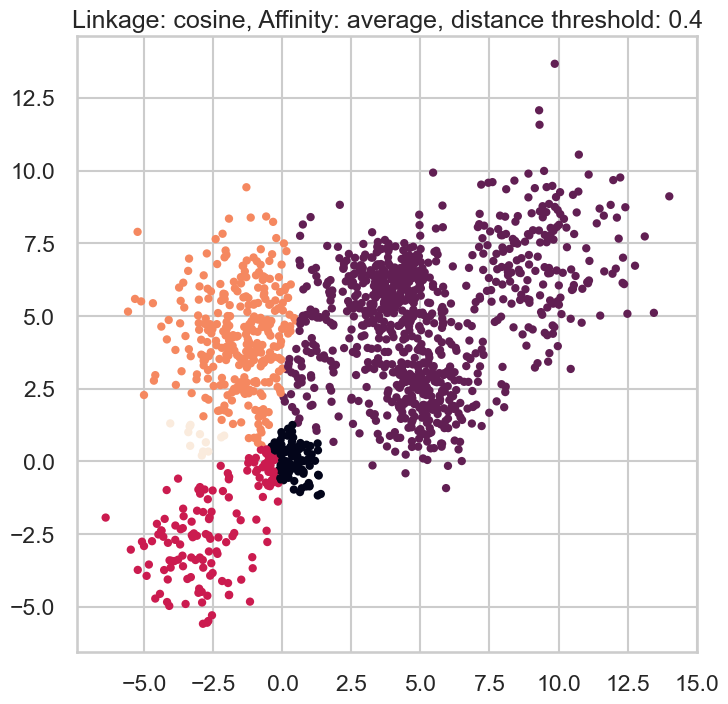

In [81]:
# using diff distance threshold  

hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='euclidean', 
                                               linkage='average', distance_threshold=5)
labels = hierarchical_cluster.fit_predict(df_multi_hier)
plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
plt.title(f'Linkage: euclidean, Affinity: average, distance threshold: 5')
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='manhattan', 
                                               linkage='average', distance_threshold=7)
labels = hierarchical_cluster.fit_predict(df_multi_hier)
plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
plt.title(f'Linkage: manhattan, Affinity: average, distance threshold: 7')
plt.show()
        
    
hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='manhattan', 
                                               linkage='average', distance_threshold=12)
labels = hierarchical_cluster.fit_predict(df_multi_hier)
plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
plt.title(f'Linkage: manhattan, Affinity: average, distance threshold: 12')
plt.show()


hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='cosine', 
                                               linkage='average', distance_threshold=0.4)
labels = hierarchical_cluster.fit_predict(df_multi_hier)
plt.scatter(df_multi_hier['col1'], df_multi_hier['col2'], c=labels,s=20)
plt.title(f'Linkage: cosine, Affinity: average, distance threshold: 0.4')
plt.show()

# euc av 5
# man av 7,12
# cos av 0.4

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [83]:
df_multi_dbscan = dftot.iloc[:,:]

In [84]:
coords = df_multi_dbscan[['col1', 'col2']]
sil_list = []
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
        ss = StandardScaler()
        coords = ss.fit_transform(coords)
        db = DBSCAN(eps=i, min_samples=j)
        db.fit(coords)
        y_pred = db.fit_predict(coords)
        if len(set(y_pred)) == 1:
            sil_list.append(-1)
            print(f'eps is {i}, minp is {j}, one cluster')
            continue
        sil_list.append(silhouette_score(df_multi_dbscan[["col1", "col2"]], y_pred))
        print(f'eps is {i}, minp is {j}, {silhouette_score(df_multi_dbscan[["col1", "col2"]], y_pred)}')
        


eps is 0.1, minp is 5.0, -0.22593141283109558
eps is 0.1, minp is 5.6899999999999995, -0.06459671057727064
eps is 0.1, minp is 6.379999999999999, -0.03452253867946502
eps is 0.1, minp is 7.0699999999999985, -0.07867425548966994
eps is 0.1, minp is 7.759999999999998, -0.07867425548966994
eps is 0.1, minp is 8.449999999999998, -0.21242742143183868
eps is 0.1, minp is 9.139999999999997, -0.21755403274669122
eps is 0.1, minp is 9.829999999999997, -0.21755403274669122
eps is 0.1, minp is 10.519999999999996, -0.1812879022592816
eps is 0.1, minp is 11.209999999999996, -0.20099060879904693
eps is 0.1, minp is 11.899999999999995, -0.20099060879904693
eps is 0.1, minp is 12.589999999999995, -0.2869309207181581
eps is 0.1, minp is 13.279999999999994, -0.30043694025294193
eps is 0.1, minp is 13.969999999999994, -0.30043694025294193
eps is 0.1, minp is 14.659999999999993, -0.2675216111049305
eps is 0.1, minp is 15.349999999999993, -0.2569622592618025
eps is 0.1, minp is 16.039999999999992, -0.25418

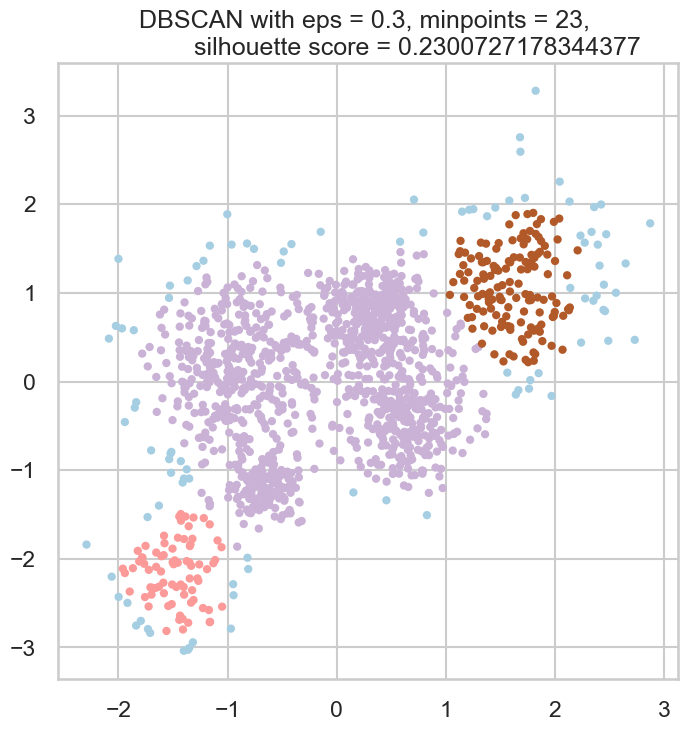

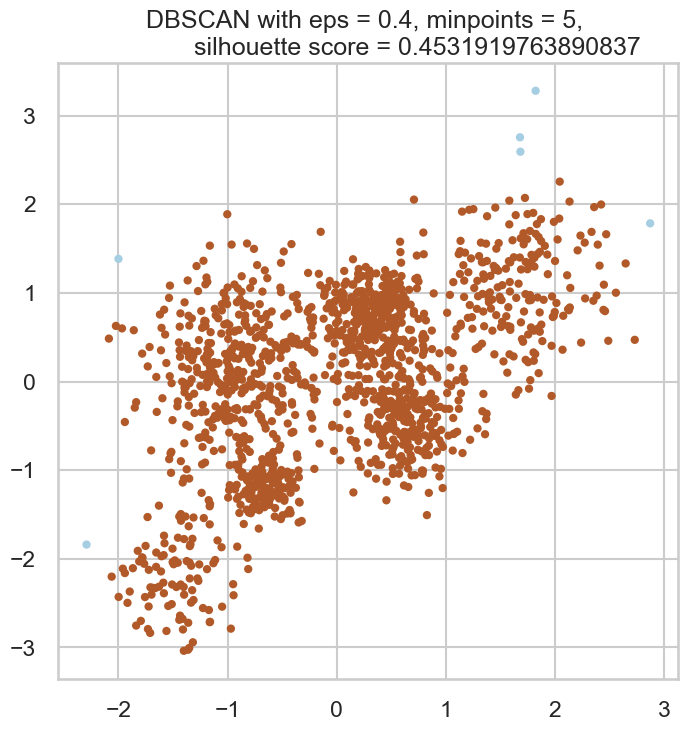

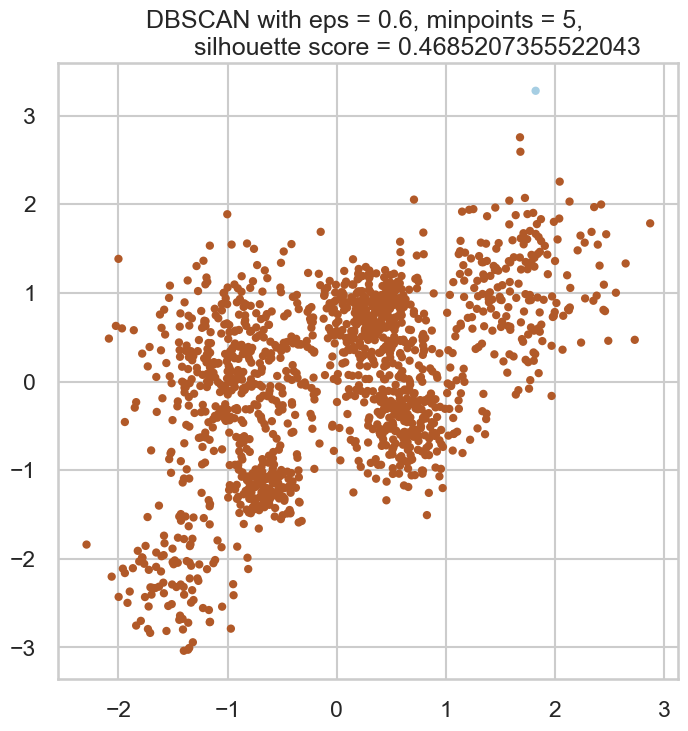

best silhouette score: 0.4685207355522043


In [58]:
eps = [0.3,0.4,0.6] 
minp = [23,5,5]
sil = -1

for i in range(0,len(eps)):
    coords = df_multi_dbscan[['col1', 'col2']]
    ss = StandardScaler()
    coords = ss.fit_transform(coords)
    db = DBSCAN(eps=eps[i], min_samples=minp[i])
    #0.21,7
    #0.3,23
    db.fit(coords)
    y_pred = db.fit_predict(coords)
    score = silhouette_score(df_multi_dbscan[['col1', 'col2']], y_pred)
    if score > sil: 
        sil = score 
    plt.scatter(coords[:, 0], coords[:, 1], c=y_pred, cmap='Paired',s=20)
    plt.title(f'''DBSCAN with eps = {eps[i]}, minpoints = {minp[i]}, 
              silhouette score = {score}''')
    plt.show()

print(f'best silhouette score: {sil}')


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [85]:
df_multi_gmm = dftot.iloc[:,:]

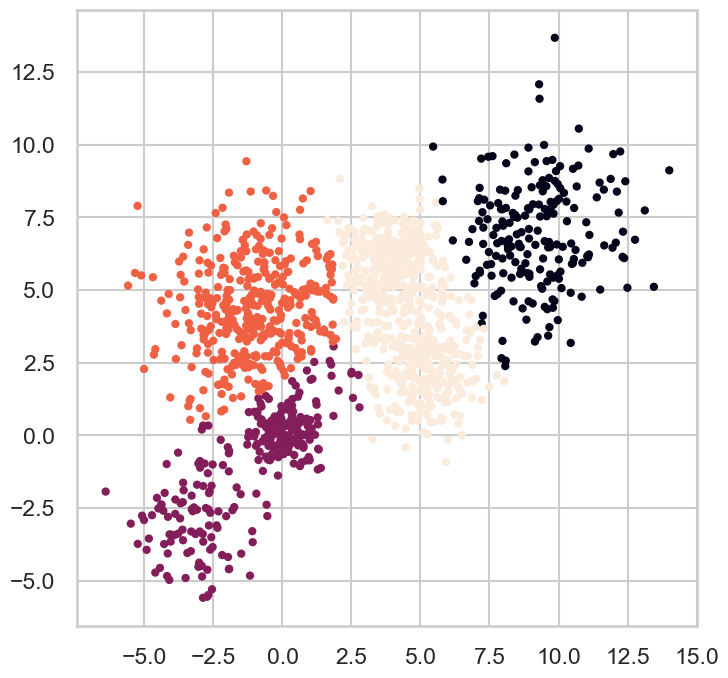

In [86]:
gmm = GaussianMixture(n_components = 4)
gmm.fit(df_multi_gmm[['col1', 'col2']])
clusters = gmm.predict(df_multi_gmm[['col1', 'col2']])
dftot['cluster'] = clusters

plt.scatter(x=df_multi_gmm["col1"], y=df_multi_gmm["col2"],s=20, c=df_multi_gmm["cluster"])
plt.show()

## Iris Data Set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [93]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target[[10, 25, 50]]
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(arr_scaled, columns=df.columns,index=df.index)
print(df_scaled)

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df
# print(df_features)
# ['setosa', 'versicolor', 'virginica']


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             0.222222          0.625000           0.067797          0.041667   
1             0.166667          0.416667           0.067797          0.041667   
2             0.111111          0.500000           0.050847          0.041667   
3             0.083333          0.458333           0.084746          0.041667   
4             0.194444          0.666667           0.067797          0.041667   
..                 ...               ...                ...               ...   
145           0.666667          0.416667           0.711864          0.916667   
146           0.555556          0.208333           0.677966          0.750000   
147           0.611111          0.416667           0.711864          0.791667   
148           0.527778          0.583333           0.745763          0.916667   
149           0.444444          0.416667           0.694915          0.708333   

     target  
0       0.0  

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0       0.0     setosa  
1       0.0     setosa  
2       0.0     setosa  
3       0.0     setosa  
4       0.0     setosa  
..      ...        ...  
145     2.0  virginica  
146     2.0  virginica  
147     2.0  virginica  
148     2.0  virginica  
149     2.0  virginica  

[150 rows x 6 columns]

### KMeans Clustering: 

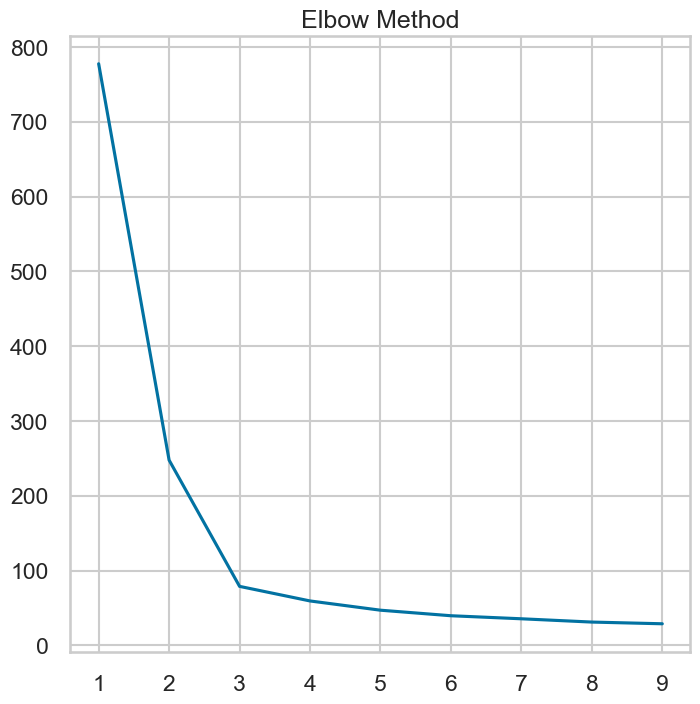

In [242]:
score_km = []
k = range(1,10)
sse = []

for i in k :
    km = KMeans(n_clusters = i)
    y_km = km.fit(df_features)
#     print(y_km)
#     score_km.append(silhouette_score(df[['sepal length (cm)', 'petal length (cm)']]
#     print(silhouette_score(df_features[['sepal length (cm)', 'petal length (cm)']], y_km))
    sse.append(km.inertia_)
#     score_km.append(silhouette_score(df[['sepal length (cm)', 'petal length (cm)']], y_km)

plt.title('Elbow Method')
plt.plot(k,sse)
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     cluster  
0          1

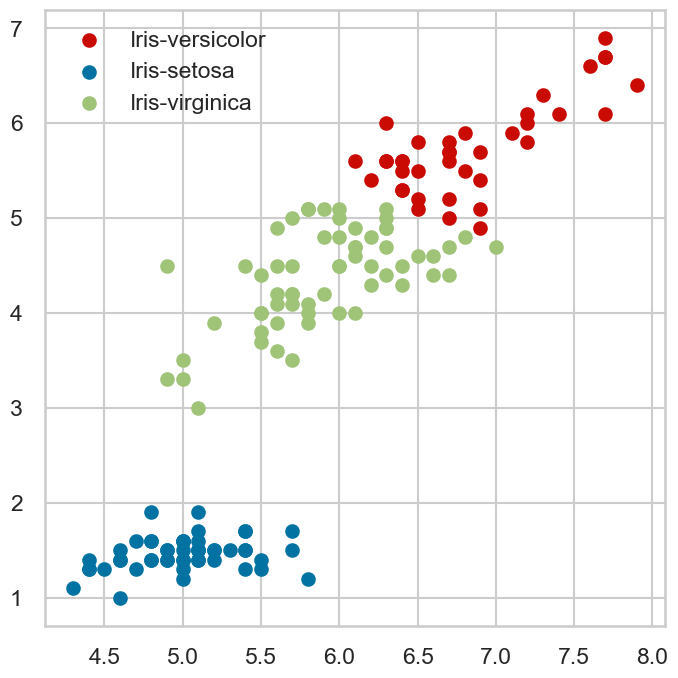

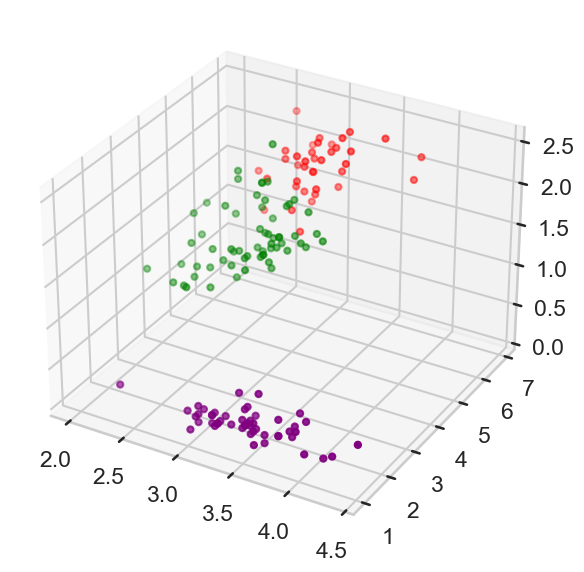

In [243]:
score_km = []
df_features = df.iloc[:,0:4]
km = KMeans(n_clusters=3)
y_km = km.fit_predict(df_features)
df_features['cluster'] = y_km

print(df_features)

# 2d
df0 = df_features[df_features['cluster'] == 0]
df1 = df_features[df_features['cluster'] == 1]
df2 = df_features[df_features['cluster'] == 2]

plt.scatter(df0.iloc[:,0], df0.iloc[:,2], color='r' , label='Iris-versicolor')
plt.scatter(df1.iloc[:,0], df1.iloc[:,2], color='b', label='Iris-setosa')
plt.scatter(df2.iloc[:,0], df2.iloc[:,2], color='g' , label='Iris-virginica')

plt.legend()
plt.show()

# 3d
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' for label in km.labels_]
ax.scatter(df_features.iloc[:,1], df_features.iloc[:,2], df_features.iloc[:,3], c=colors)

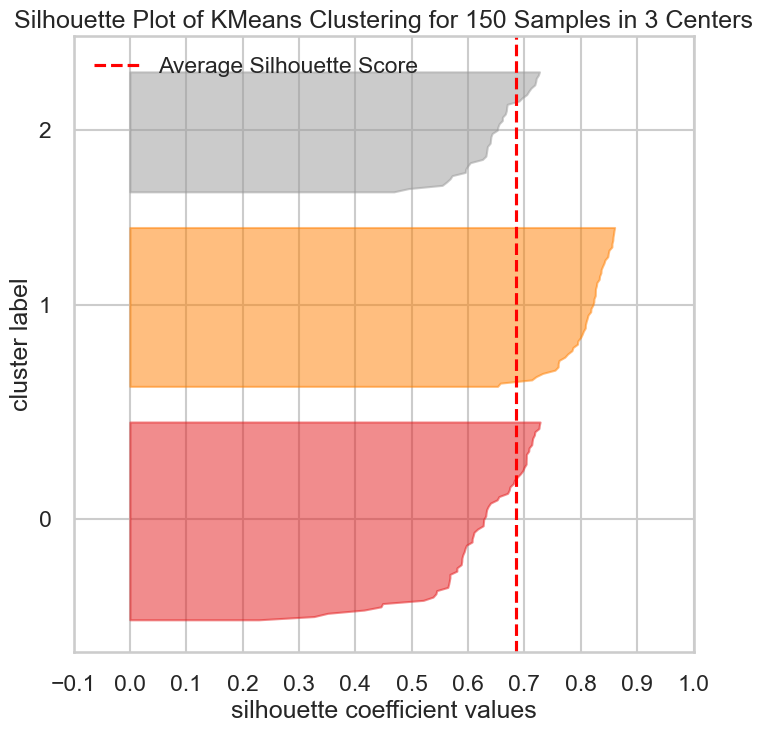

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [244]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_features) 
visualizer.show()

In [235]:
# sns.color_palette("pastel")
# sns.pairplot(df_features, hue='cluster')
# plt.show()

### DBSCAN Clustering 

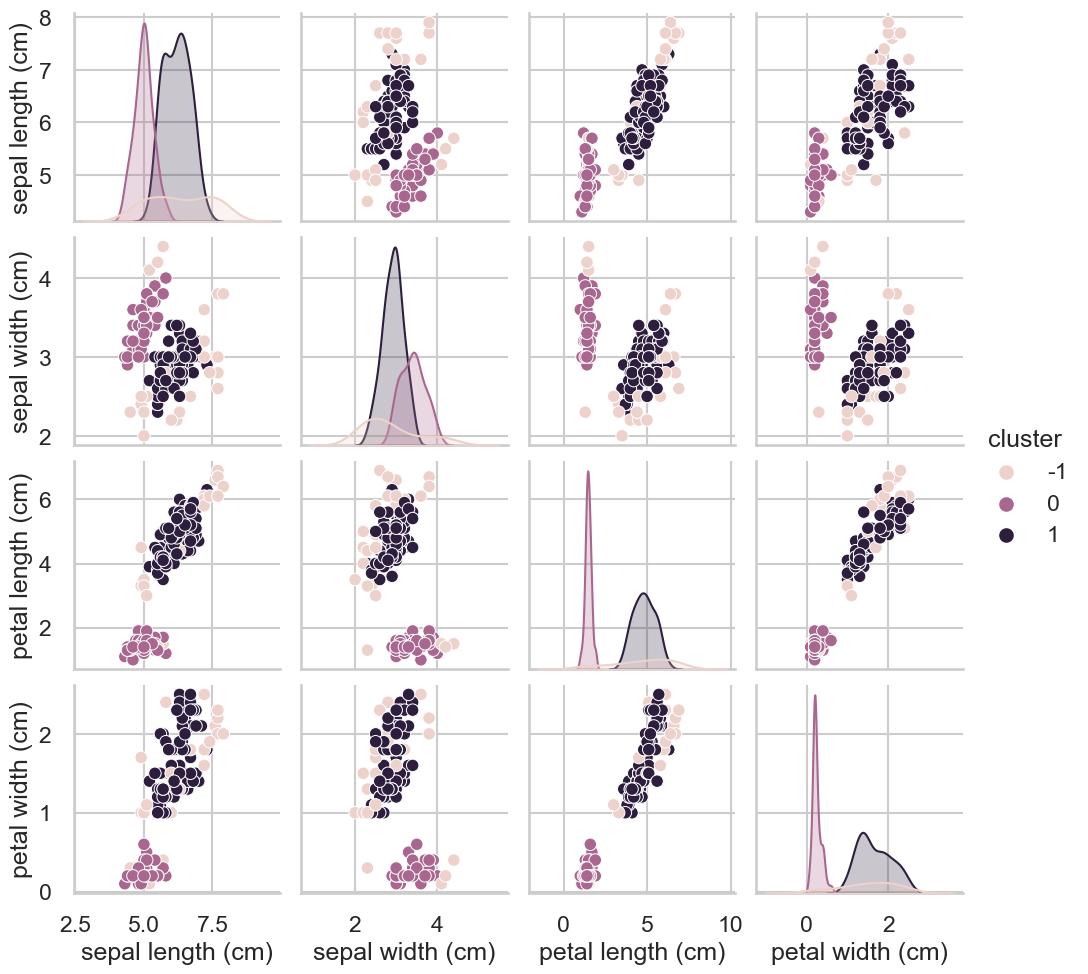

In [192]:
# coords = dftot[['col1', 'col2']]
df_features_dbscan = df.iloc[:,0:4]
ss = StandardScaler()
coords = ss.fit_transform(df_features_dbscan)

dbscan = DBSCAN(eps=0.6,min_samples=5)
y_db = dbscan.fit_predict(coords)
df_features_dbscan['cluster'] = y_db

sns.color_palette("pastel")
sns.pairplot(df_features_dbscan, hue='cluster')
plt.show()

### Hierarchical Clustering

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target    species  
0 

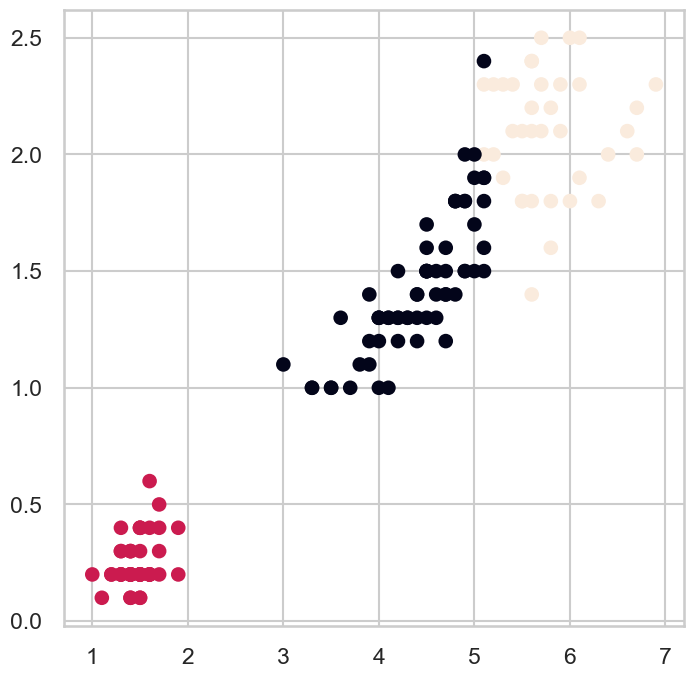

In [245]:
df_hier = df.iloc[:,0:4]
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(df_hier)
print(df)
plt.scatter(df_hier.iloc[:,2], df_hier.iloc[:,3], c=labels)
plt.show()

### GMM

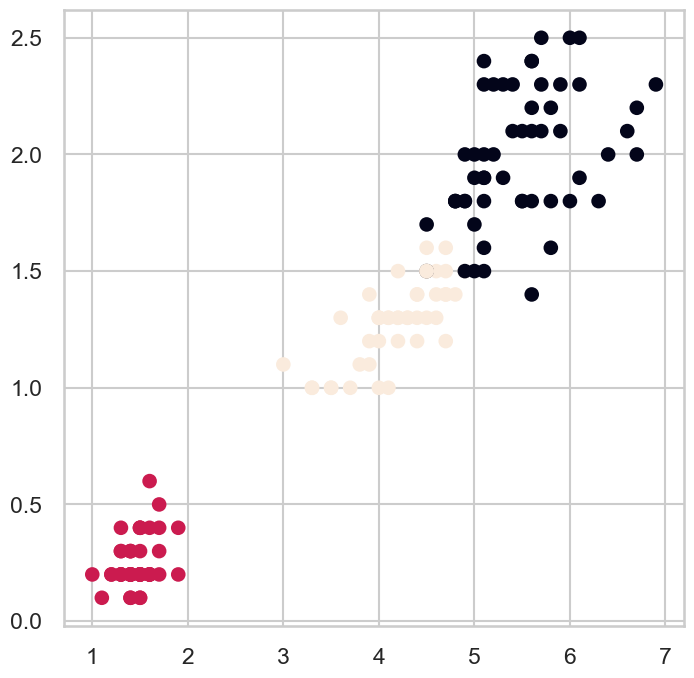

In [195]:
df_gmm = df.iloc[:,0:4]
gmm = GaussianMixture(n_components = 3)
gmm.fit(df_gmm)
clusters = gmm.predict(df_gmm)
df_gmm['cluster'] = clusters

plt.scatter(df_gmm.iloc[:,2], df_gmm.iloc[:,3], c=df_gmm["cluster"])
plt.show()

## Customer dataset
Repeat all the above on the customer data set 

In [4]:
df_cust = pd.read_csv(r'D:\Zeina\Uni\Semester 10\Customer data.csv')
print(df_cust)

             ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2              

In [54]:
df_feat = df_cust.iloc[:,1:]

### KMeans

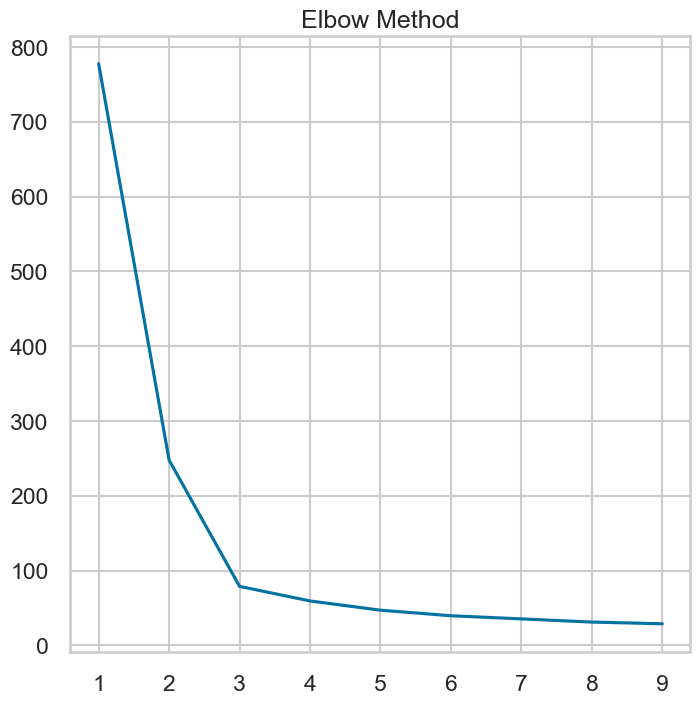

In [221]:
score_km = []
k = range(1,10)
sse = []

for i in k :
    km = KMeans(n_clusters = i)
    y_km = km.fit(df_features)
    sse.append(km.inertia_)

plt.title('Elbow Method')
plt.plot(k,sse)
plt.show()

#### Deciding between 3 or 4 clusters

In [55]:
print(df_feat)

# km2 = KMeans(n_clusters=2)
# y_km2 = km2.fit_predict(df_feat)

km3 = KMeans(n_clusters=3)
y_km3 = km3.fit_predict(df_feat)
# df_feat['cluster'] = y_km3

km4 = KMeans(n_clusters=4)
y_km4 = km4.fit_predict(df_feat)

# print(f'sil score for k = 2: {silhouette_score(df_feat, y_km2)}')
print(f'sil score for k = 3: {silhouette_score(df_feat, y_km3)}')
print(f'sil score for k = 4: {silhouette_score(df_feat, y_km4)}')

      Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]
sil score for k = 2: 0.5834

#### Using k = 4

In [223]:
df_feat['cluster'] = y_km4
print(df_feat)

      Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  cluster  
0                   2        3  
1                   2        2  
2                   0        0  
3                   1        2  
4                   1        2  
...               ...

### DBSCAN

In [234]:
df_cust_dbscan = df_cust.iloc[:,1:]
# ss = StandardScaler()
# coords = ss.fit_transform(df_dbscan)

# dbscan = DBSCAN(eps=10, min_samples=200)
# y_db = dbscan.fit_predict(coords)
# # # df_features_dbscan['cluster'] = y_db
# silhouette_score(df_dbscan, y_db)

# # sns.color_palette("pastel")
# # sns.pairplot(df_features_dbscan, hue='cluster')
# # plt.show()

In [227]:
for i in np.arange(0.1, 3.1, 0.1):
    for j in np.arange(5, 26, 0.69):
        ss = StandardScaler()
        coords = ss.fit_transform(coords)
        db = DBSCAN(eps=i, min_samples=j)
        db.fit(coords)
        y_db = dbscan.fit_predict(coords)
        if len(set(y_pred)) == 1:
            print(f'eps is {i}, minp is {j}, one cluster')
            continue
#         sil_list.append(silhouette_score(df_dbscan, y_db))
        print(f'eps is {i}, minp is {j}, {silhouette_score(df_cust_dbscan, y_db)}')

eps is 0.1, minp is 5.0, -0.6215606863147625
eps is 0.1, minp is 5.6899999999999995, -0.6215606863147625
eps is 0.1, minp is 6.379999999999999, -0.6215606863147625
eps is 0.1, minp is 7.0699999999999985, -0.6215606863147625
eps is 0.1, minp is 7.759999999999998, -0.6215606863147625
eps is 0.1, minp is 8.449999999999998, -0.6215606863147625
eps is 0.1, minp is 9.139999999999997, -0.6215606863147625
eps is 0.1, minp is 9.829999999999997, -0.6215606863147625
eps is 0.1, minp is 10.519999999999996, -0.6215606863147625
eps is 0.1, minp is 11.209999999999996, -0.6215606863147625
eps is 0.1, minp is 11.899999999999995, -0.6215606863147625
eps is 0.1, minp is 12.589999999999995, -0.6215606863147625
eps is 0.1, minp is 13.279999999999994, -0.6215606863147625
eps is 0.1, minp is 13.969999999999994, -0.6215606863147625
eps is 0.1, minp is 14.659999999999993, -0.6215606863147625
eps is 0.1, minp is 15.349999999999993, -0.6215606863147625
eps is 0.1, minp is 16.039999999999992, -0.6215606863147625


#### all values give -0.6215606863147625

### Hierarchical 

In [68]:
df_cust_hier = df_cust.iloc[:,1:]

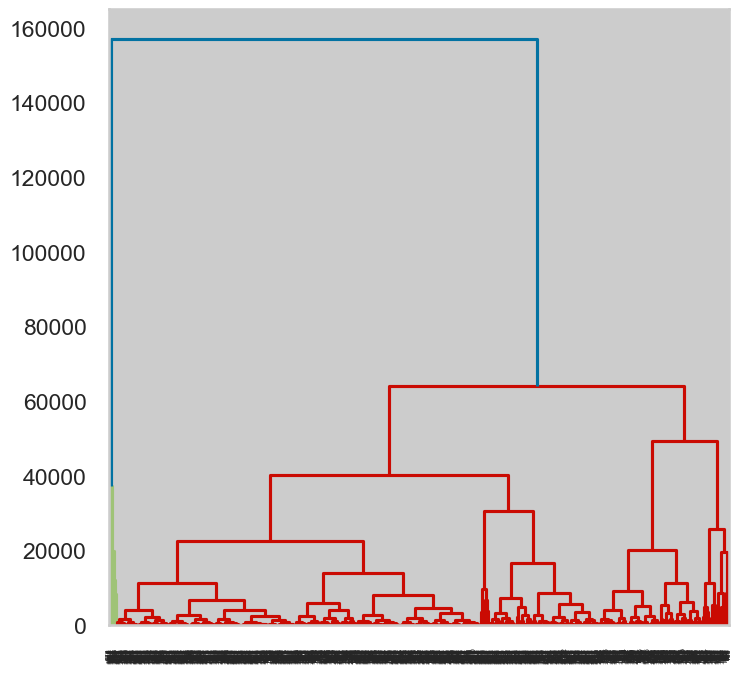

In [30]:
dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "average", metric='euclidean'))
plt.show()

In [43]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
silhouette_score(df_cust_hier, labels)

0.72930877967469

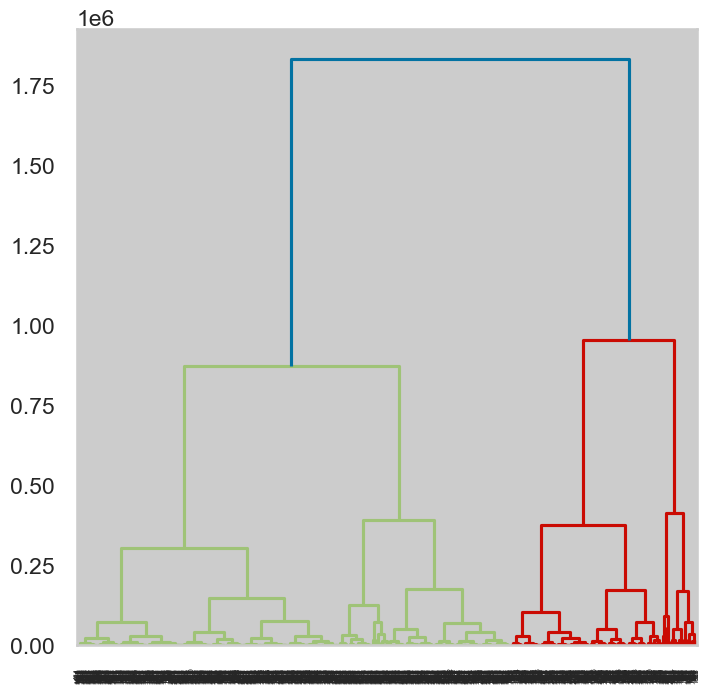

In [34]:
# df_cust_hier = df_cust.iloc[:,1:]
dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "ward", metric='euclidean'))
plt.show()

In [40]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', 
                                           linkage='ward')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
silhouette_score(df_cust_hier, labels)

0.5317617689963741

In [36]:
# dendrogram = sch.dendrogram(sch.linkage(df_cust_hier, method  = "single", metric='euclidean'))
# plt.show()

In [45]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
silhouette_score(df_cust_hier, labels)

0.72930877967469

In [53]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', 
                                           linkage='average')
labels = hierarchical_cluster.fit_predict(df_cust_hier)
df_cust_hier['cluster'] = labels
print(df_cust_hier)
# print(np.array(labels))
print(len(set(df_cust_hier['cluster'])))

      Sex  Marital status  Age  Education  Income  Occupation  \
0       0               0   67          2  124670           1   
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
...   ...             ...  ...        ...     ...         ...   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1997    0               0   31          0   86400           0   
1998    1               1   24          1   97968           0   
1999    0               0   25          0   68416           0   

      Settlement size  cluster  
0                   2        0  
1                   2        0  
2                   0        0  
3                   1        0  
4                   1        0  
...               ...

In [56]:
# df_cust_hier = df_cust.iloc[:,1:]
# sil_cust_hier = []
# for i in np.arange(1,120,100):
#     hierarchical_cluster = AgglomerativeClustering(n_clusters=None,affinity='euclidean', 
#                                                linkage='average', distance_threshold=i)
#     labels = hierarchical_cluster.fit_predict(df_cust_hier)
#     sil_cust_hier.append(silhouette_score(df_cust_hier, labels))
# # best sil for euc av is at threshold = 300 > 0.56 [[[[[[[[[[[same as manhattan]]]]]]]]]]]
# # best sil for euc ward is at threshold = 700 > 0.58

# plt.title("affinity='euclidean',linkage='average'")
# plt.plot(np.arange(100,1100,100),sil_cust_hier)

### GMM

In [58]:
df_cust_gmm = df_cust.iloc[:,1:]
covar_type = ["full","tied","diag","spherical"]
clusters = [2,3,4]
for c in clusters:
    for co in covar_type:     
        gmm = GaussianMixture(n_components = c, covariance_type=co)
        gmm.fit(df_cust_gmm)
        clusters = gmm.predict(df_cust_gmm)
        print(f'{c} clusters, {co} type, {silhouette_score(df_cust_gmm, clusters)}')

2 clusters, full type, -0.013821893335345472
2 clusters, tied type, 0.6376184153883705
2 clusters, diag type, 0.18905237326302182
2 clusters, spherical type, 0.5680062805133561
3 clusters, full type, -0.08170257965200979
3 clusters, tied type, 0.18118145274862302
3 clusters, diag type, 0.1014129084213815
3 clusters, spherical type, 0.48273006661002044
4 clusters, full type, 0.13840890399856987
4 clusters, tied type, 0.15394943078597903
4 clusters, diag type, 0.04966678245297279
4 clusters, spherical type, 0.45626242198584277


#### Clustering with highest silhouette score: 2 clusters, tied covariance type, silhouette score: 0.6376184153883705

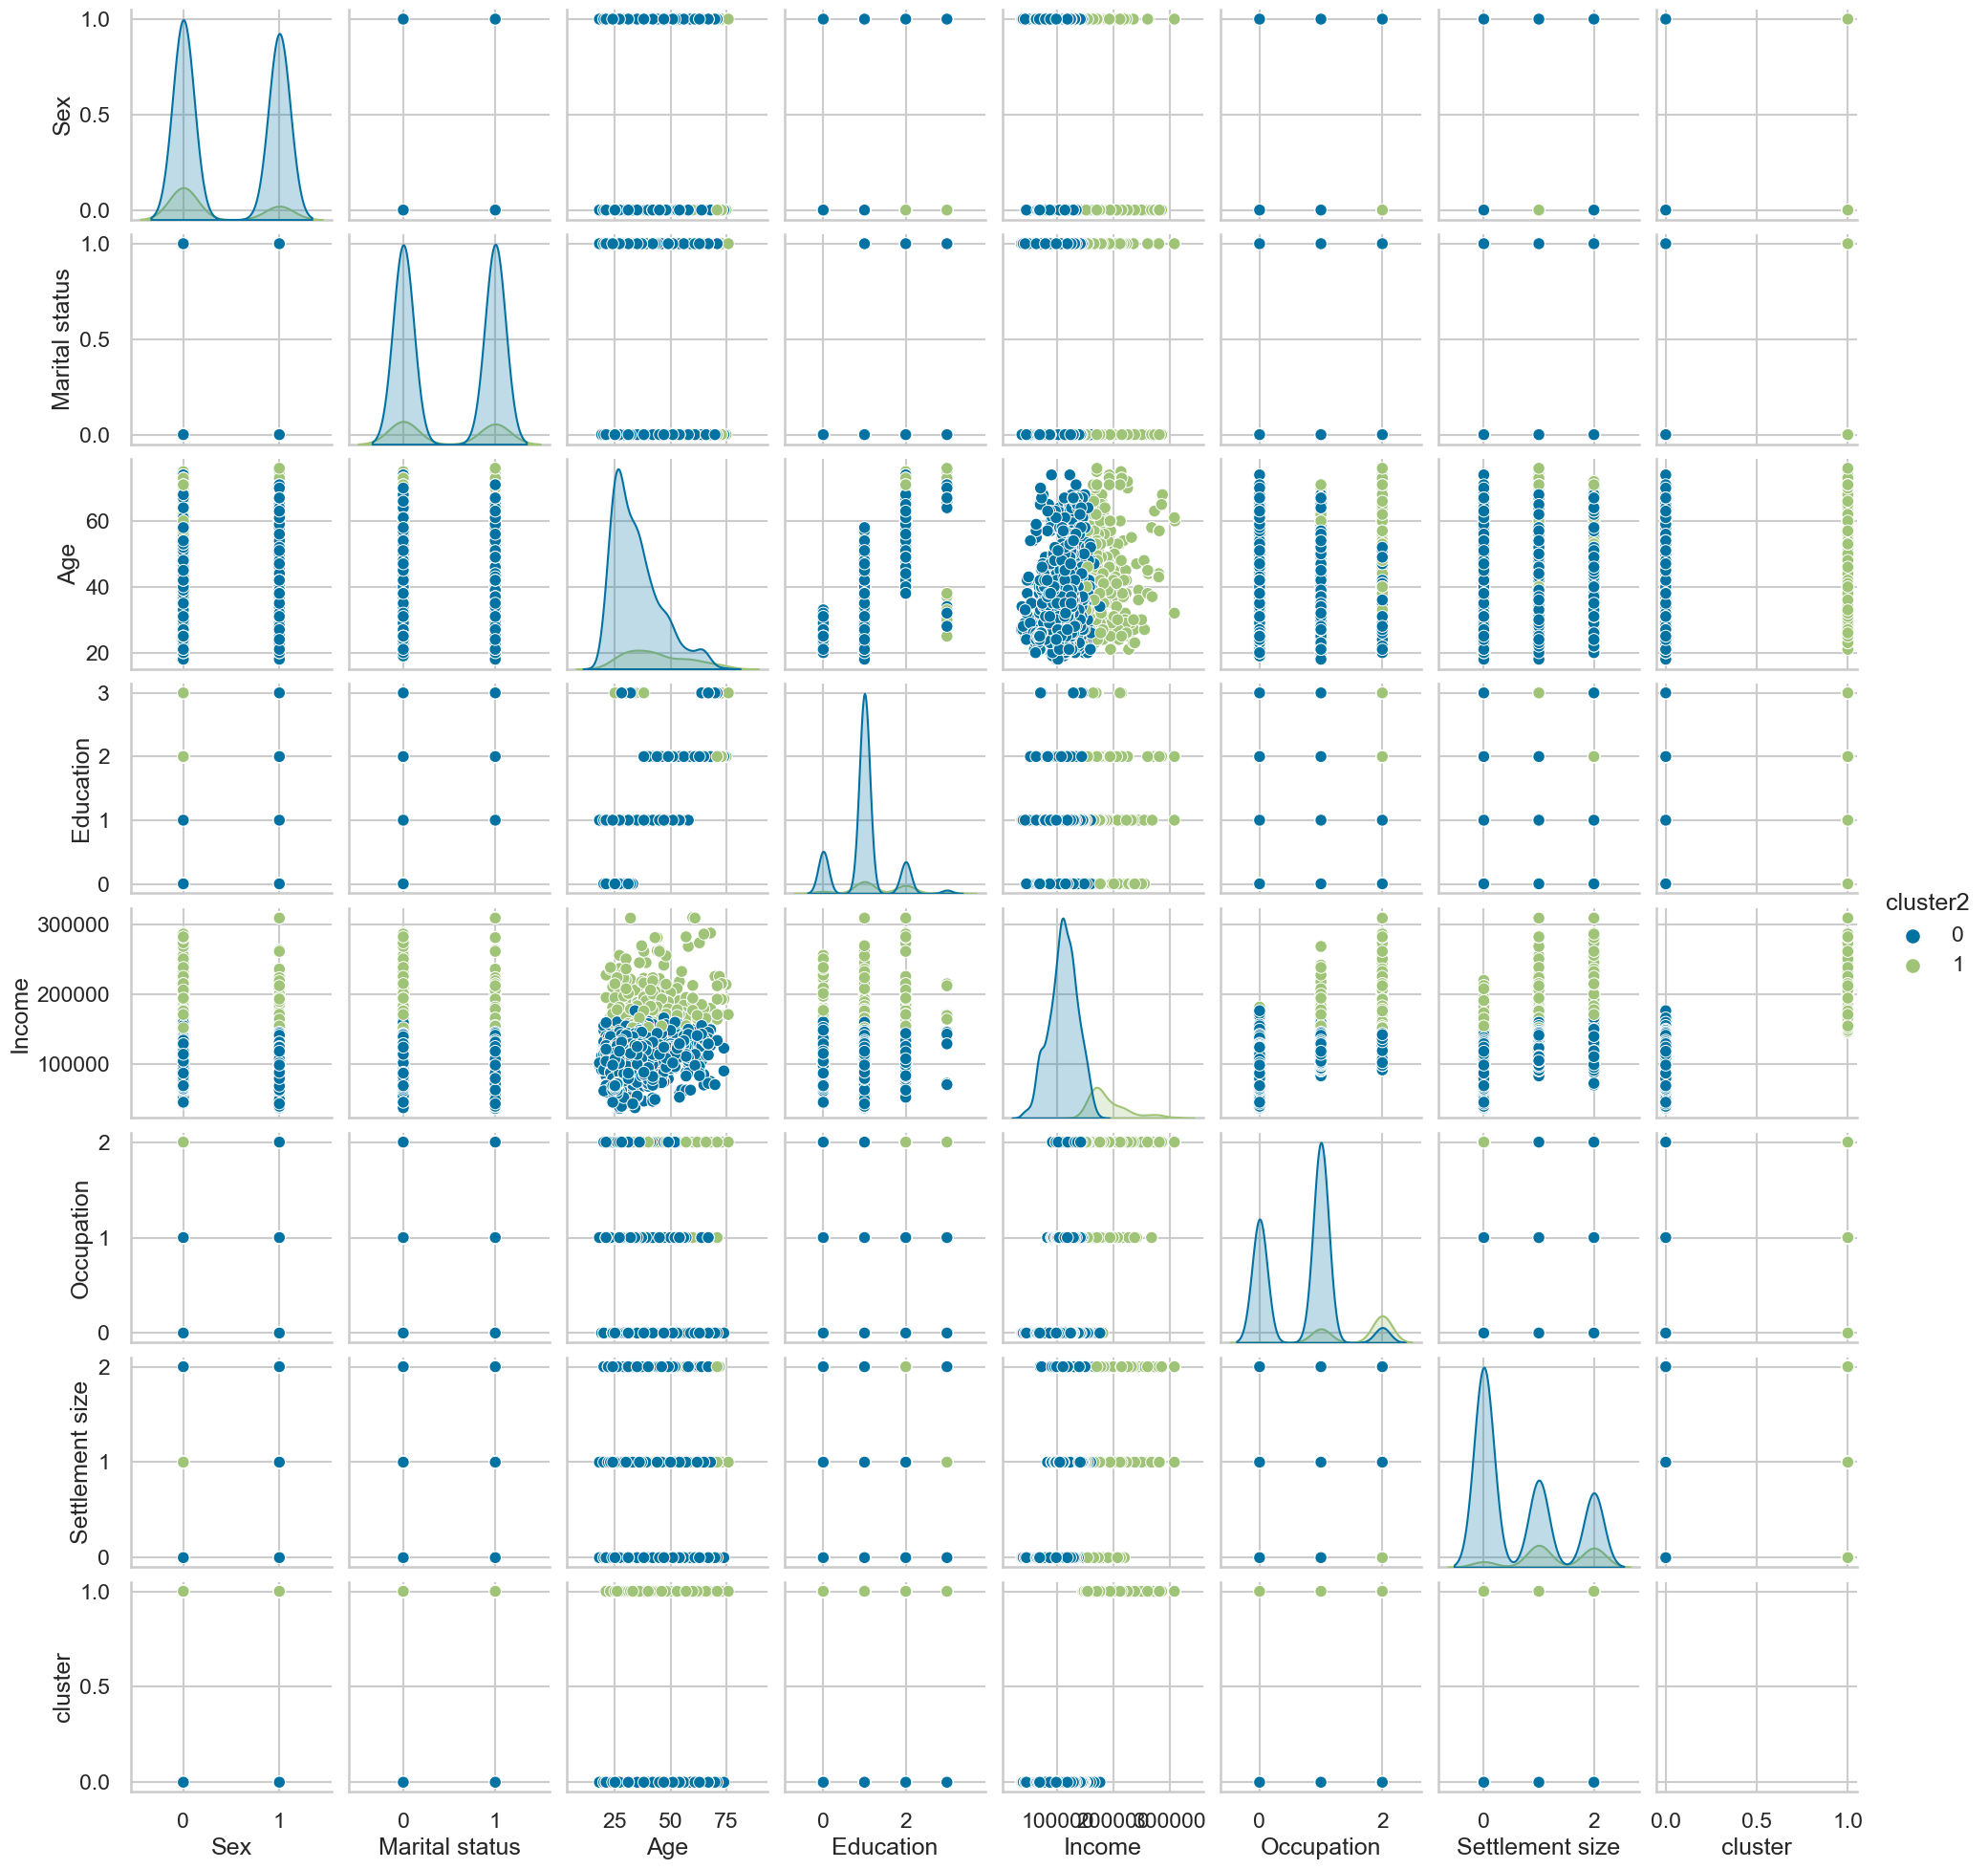

In [70]:
gmm = GaussianMixture(n_components = 2, covariance_type='tied')
gmm.fit(df_cust_gmm)
clusters = gmm.predict(df_cust_gmm)
df_cust_gmm['cluster2'] = clusters

sns.color_palette("pastel")
sns.pairplot(df_cust_gmm, hue='cluster2')
plt.show()

#### Clustering with 3 clusters, spherical covariance type, silhouette score: 0.48273006661002044

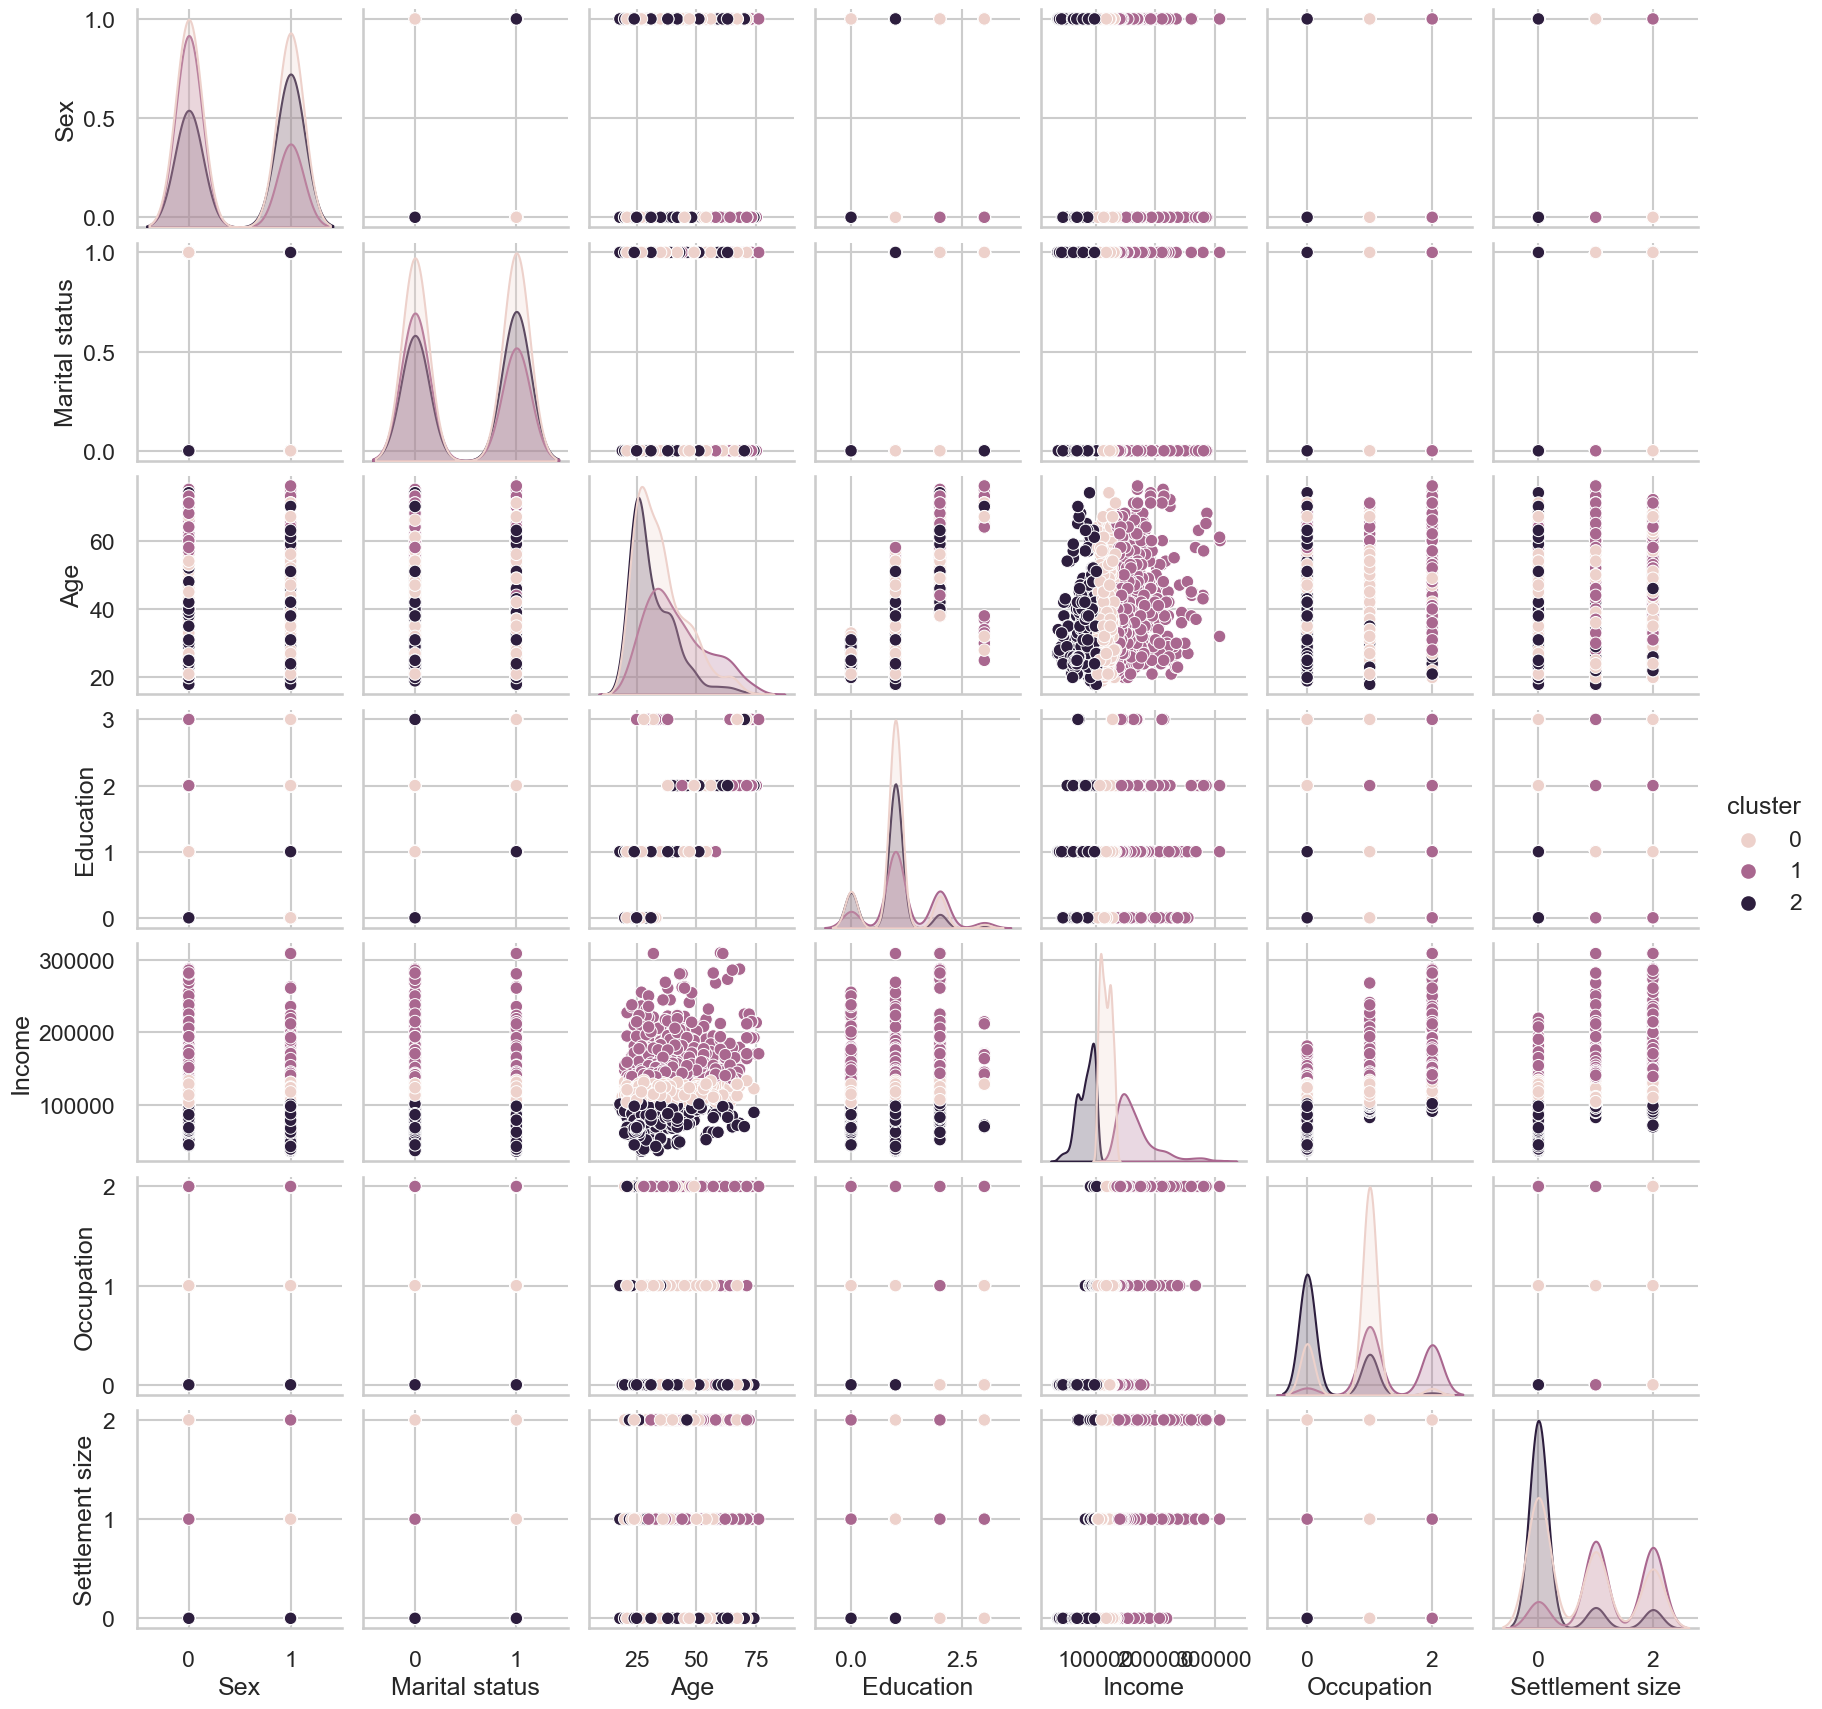

In [64]:
gmm = GaussianMixture(n_components = 3, covariance_type='spherical')
gmm.fit(df_cust_gmm)
clusters = gmm.predict(df_cust_gmm)
df_cust_gmm['cluster3'] = clusters

sns.color_palette("pastel")
sns.pairplot(df_cust_gmm, hue='cluster3')
plt.show()